# TP1 EXO 2 - Méthode Monte carlo

1. Approximation de pi à partir d'un quart de cercle: aire_cercle = pi *r²

**Approx_pi** = Aire totale carré (4) * Nb points sous la courbe / Nb total de points  

2.  Approximation d'une intégrale : 

**Approx_integrale** = Aire du rectangle * Nb points sous la courbe / Nb total de points 

### 1. Jeu de flechette - approximation de PI par monte-carlo

On lance au hasard des fléchettes sur une cible carrée de côté 1 sur laquelle est représenté un quart de disque de rayon 1 
et de centre l’origine. On suppose que l’origine se situe sur le coin en bas à gauche de la cible. 
On considère l’évènement 𝐴 : « la fléchette arrive dans le quart de disque ». 

Valeur approximative de pi par la méthode de monte-carlo est 2.944
Avec un nombre total de fléchettes : 500
Nombre de fléchettes dans le cadran : 368


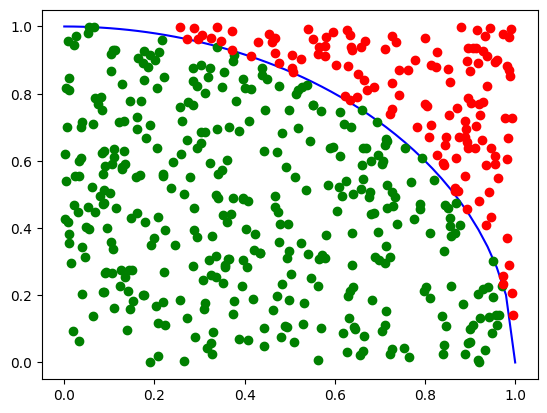

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Tracer la courbe du cercle
x = np.linspace(0,1,50)
y = (1-x**2)**(1/2)     #eq de y : x²+y²=1
plt.plot(x, y, 'b')

# Simulation empirique de n lancers de fleches
essais = 500   
cpt = 0

for i in range (essais) :
    px = np.random.uniform(0,1)     # np.rand(2)
    py = np.random.uniform(0,1)
    if (px**2 + py**2 < 1) :        #interieur du quart de cercle
        plt.plot(px, py,'o', color = 'green')
        cpt +=1
    else : 
        plt.plot(px, py,'o', color = 'red')

# Estimation de pi
pi = 4*cpt / essais     # aire_complete * rapport des aires

# conclusion
print("Valeur approximative de pi par la méthode de monte-carlo est", pi)
print("Avec un nombre total de fléchettes :", essais)
print("Nombre de fléchettes dans le cadran :", cpt)


### 2. Approximation d'une intégrale

La méthode précédente, basée sur un rapport d’aires, permet de calculer des intégrales. Par exemple, en remplaçant l’arc 
de  cercle  par  la  représentation  graphique  de  la  fonction  𝑥 ⟼ln𝑥 / 𝑥2 ,  appliquer  ce  principe  au  calcul  suivant  : 𝐽 =∫ln𝑥 /𝑥2 𝑑𝑥 [e,1]


C:\Users\estelle\AppData\Local\Temp\ipykernel_23488\3008790514.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integrale = np.trapz(y,x)


Avec un nombre total de fléchettes : 7000
Nombre de fléchettes sous la courbe : 2167
la valeur approximative de l'intégrale est 0.26596548016219645
Valeur exacte de l'integrale : 0.26413359586895757


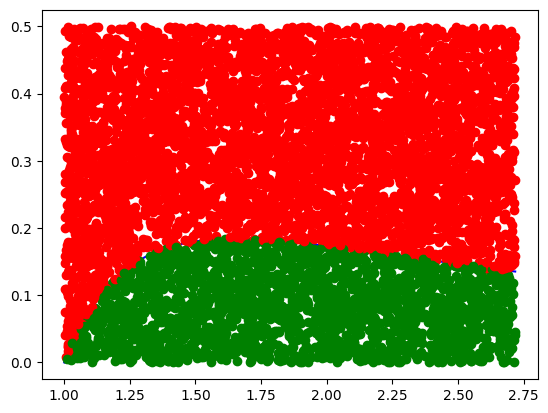

In [39]:
# Tracer la courbe 𝑥 ⟼ln𝑥 / 𝑥2
x = np.linspace(1,np.e,50)
y = np.log(x)/x**2
plt.plot(x, y, 'b')  #bleu

# Simulation empirique de n lancers de fleches
essais = 7000   
cpt = 0

for i in range (essais) :
    px = np.random.uniform(1, np.e)     #intervalle de l'integrale
    py = np.random.uniform(0, 0.5)
    if (py < np.log(px)/px**2) :        #formule de la courbe
        plt.plot(px, py,'o', color = 'green')
        cpt +=1
    else : 
        plt.plot(px, py,'o', color = 'red')

# Estimation de l'intégrale
largeur_rectangle = np.e - 1
hauteur_rectangle = 0.5
appro_inte = largeur_rectangle * hauteur_rectangle * cpt / essais

# Calcul theorique
integrale = np.trapz(y,x)  

# conclusion
print("Avec un nombre total de fléchettes :", essais)
print("Nombre de fléchettes sous la courbe :", cpt)
print("la valeur approximative de l'intégrale est", appro_inte)
print("Valeur exacte de l'integrale :", integrale)

### 3. Approximation d'une double intégrale

Faire une estimation de l’intégrale : 

𝐼 =∫∫ 1/(𝑥+𝑦)3 𝑑𝑥𝑑𝑦

avec : 𝒟 ={(𝑥,𝑦)∈ℝ2  |   1≤𝑥 ≤3,      𝑦≥2,      𝑥+𝑦≤5} 
- bornes : 1<= x<= 3 et 2<= y<= 5-x
- I≈0.0267 

Avec un nombre total de fléchettes : 1000
Nombre de fléchettes sous la courbe : 148
la valeur approximative de l'intégrale est 0.04440000000000001
Valeur exacte de l'integrale : 0.026


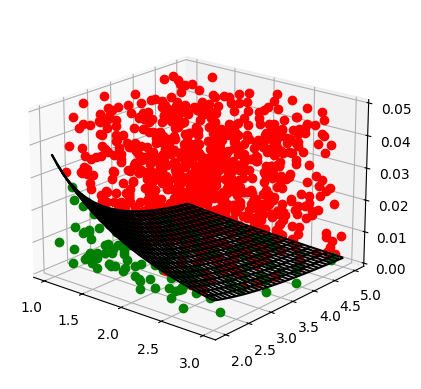

In [44]:

# Affichage de la surface 𝑧 =1/(𝑥+𝑦)3 (énoncé)
X, Y = np.meshgrid(np.arange(1, 3.1, 0.1), np.arange(2, 5.1, 0.1))
Z = 1 / (X + Y)**3
fig = plt.figure()  #figsize(5,5)
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, color='k')
ax.view_init(elev=20, azim=-50)

# Simulation empirique de n lancers de fleches
essais = 1000 
cpt = 0

for i in range (essais) :
    px = np.random.uniform(1, 3)
    py = np.random.uniform(2, 5)
    pz = np.random.uniform(0,0.05)
    
    if (pz < (1 / (px + py)**3)) :    # surface z
        ax.plot(px, py, pz, 'o', color='green')  # Points sous la surface
        cpt +=1
    else : 
        ax.plot(px, py, pz, 'o', color='red')  # Points sous la surface

# Approximation de la double intégrale
largeur_x = 3 - 1
longueur_y = 5 - 2
hauteur = 0.05  # = 1/(1+2)**3 = 0.05
appro_inte = largeur_x * longueur_y * hauteur *cpt / essais

# Calcul theorique de la double interale

# Intégration d'abord par rapport à y, puis à x
#integrale_y = np.trapz(Z, y)
#integrale_xy = np.trapz(integrale_y, x)

 
# Conclusion
print("Avec un nombre total de fléchettes :", essais)
print("Nombre de fléchettes sous la courbe :", cpt)
print("la valeur approximative de l'intégrale est", appro_inte)
print("Valeur exacte de l'integrale :", 0.026)